<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/03-linear-regression/1_linear_regression_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Regression Fundamentals

Linear regression algorithm consists of repeating a step in which we move a line closer to a point. We can do this using rotations and translations of **Linear Algebra Transformation** techniques.


##Setup

In [ ]:
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_3_Linear_Regression/utils.py

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random
from utils import *

##Synthetic dataset

In [3]:
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


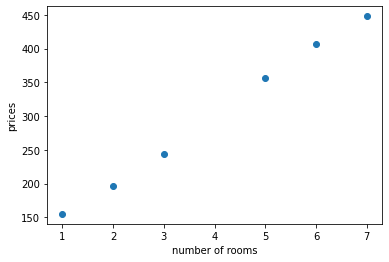

In [4]:
plot_points(features, labels)

We have to predict the price of house having rooms 4.

##The square trick

It is a much more clever way of moving our line closer
to one of the points.

The square trick will bring these four cases down to one by finding
values with the correct signs `(+ or –)` to add to the slope and the y-intercept for the line to always move closer to the point.

In [5]:
def square_trick(base_price, price_per_room, num_rooms, actual_price, learning_rate):
  """
  b=base_price
  m=price_per_room
  x=num_rooms
  """
  # Calculates the prediction
  predicted_price = base_price + price_per_room * num_rooms
  # Translates the line
  base_price  += learning_rate * (actual_price - predicted_price)
  # Rotates the line
  price_per_room += learning_rate * num_rooms * (actual_price - predicted_price)
  
  return price_per_room, base_price

##The absolute trick

It is another useful trick to move the line closer to the points.

This is an intermediate between the simple and the square tricks.

In [6]:
def absolute_trick(base_price, price_per_room, num_rooms, actual_price, learning_rate):
  """
  b=base_price
  m=price_per_room
  x=num_rooms
  """
  # Calculates the prediction
  predicted_price = base_price + price_per_room * num_rooms
  if actual_price > predicted_price:
    # Translates the line
    price_per_room += learning_rate * num_rooms
    base_price  += learning_rate
  else:
    # # Rotates the line
    price_per_room -= learning_rate * num_rooms
    base_price  -= learning_rate
  
  return price_per_room, base_price

##The linear regression algorithm

**We will repeat the absolute or square trick
many times to move the line closer to the points.**

This algorithm takes as input a bunch of points and returns a line that fits them well. This algorithm
consists of starting with random values for our slope and our y-intercept and then repeating
the procedure of updating them many times using the absolute or the square trick.

Each iteration of the loop is called an epoch, and we set this number at the beginning of our
algorithm.

In real life, we use the absolute or square trick, which works a lot better.
In fact, although both are commonly used, the square trick is more popular.



In [13]:
def linear_regression(features, labels, learning_rate=0.01, epochs=1000, progress=1):
  # Generates random values for the slope and the y-intercept
  price_per_room = random.random()
  base_price = random.random()

  for epoch in range(epochs):
    if epoch == progress:
      draw_line(price_per_room, base_price, starting=0, ending=8)
    
    # Picks a random point on our dataset
    i = random.randint(0, len(features) - 1)
    num_rooms = features[i]
    actual_price = labels[i]

    # Applies the square trick to move the line closer to our point
    price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, actual_price, learning_rate=learning_rate)

  draw_line(price_per_room, base_price, "black", starting=0, ending=8)
  plot_points(features, labels)

  print(f"Price per room: {price_per_room}")
  print(f"Base price: {base_price}")

  return price_per_room, base_price

Price per room: 53.00861258475944
Base price: 89.33669193107285


(53.00861258475944, 89.33669193107285)

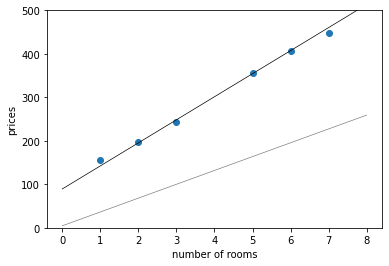

In [14]:
plt.ylim(0, 500)

linear_regression(features, labels, learning_rate=0.01, epochs=1000)

Price per room: 52.76821839316407
Base price: 89.08813424316719


(52.76821839316407, 89.08813424316719)

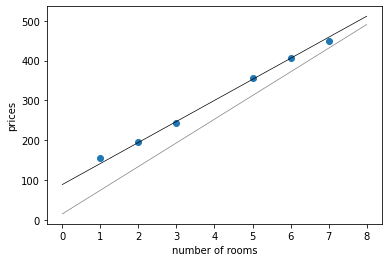

In [15]:
linear_regression(features, labels, learning_rate=0.01, epochs=1000, progress=10)

Price per room: 52.848694194241894
Base price: 90.11609542911779


(52.848694194241894, 90.11609542911779)

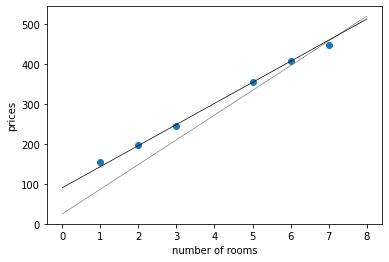

In [16]:
linear_regression(features, labels, learning_rate=0.01, epochs=1000, progress=50)

Price per room: 51.45259986645164
Base price: 90.70622227875543


(51.45259986645164, 90.70622227875543)

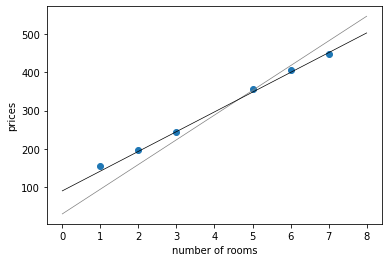

In [17]:
linear_regression(features, labels, learning_rate=0.01, epochs=1000, progress=100)

Price per room: 52.24735065628506
Base price: 88.61883759105858


(52.24735065628506, 88.61883759105858)

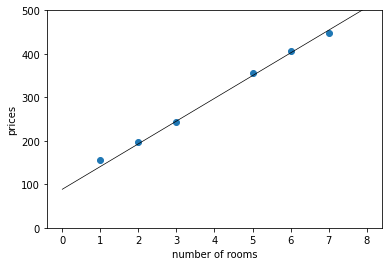

In [19]:
plt.ylim(0, 500)
linear_regression(features, labels, learning_rate=0.01, epochs=1000, progress=1000)

##Using the model to make predictions

Now that we have a shiny linear regression model, we can use it to make predictions!

we ran the algorithm and obtained a slope (price per room) of 52.25 and a
y-intercept (base price of the house) of 88.61. 

Thus, the equation follows:

In [20]:
r = 4
p = 52.24 * r + 88.61

The prediction the model makes for a house with r = 4 rooms is

In [21]:
p

297.57

Note that `$297.57` is not far from the `$300`.

##The error function